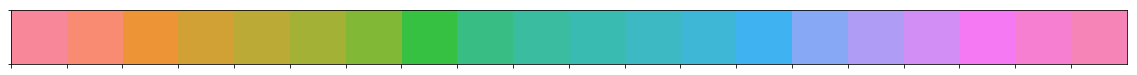

In [1]:
%matplotlib inline
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np
import math
import pandas as pd
from scipy.integrate import odeint
import os

# plt.style.use("seaborn-whitegrid")
plt.rcParams['figure.figsize'] = [10.0, 8.0]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['grid.linestyle'] = '-'
plt.rcParams['legend.fontsize'] = 14
colors = [i['color'] for i in plt.rcParams['axes.prop_cycle']]

sns.palplot(sns.husl_palette(20, l=.7))
palette_husl = sns.husl_palette(20, l=.7)
# palette_husl.as_hex()

# ptps

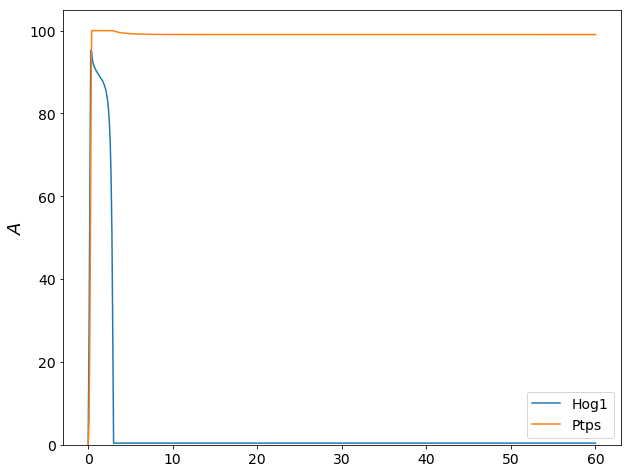

In [56]:
Hog1 = 0
Ptps = 0
Hog1_t = 100
Ptps_t = 100
s = 100

initial = [Hog1, Ptps]
params_constants = [Hog1_t, Ptps_t, s]

dt = 0.1
steps = 600
time = np.linspace(0,dt*steps,steps)

a1 =2
a2=5
b1=7
b2=1
K_1 = 1
K_2 = 1
K_3 =1
K_4 =1
A = 6.2

params= [a1, a2, b1, b2, K_1, K_3,    K_2, K_4, A]
def ptps(initals,t,params_constants,params):
    Hog1, Ptps = initals 
    Hog1_t, Ptps_t, s = params_constants
    a1, a2, b1, b2, K_1, K_3,    K_2, K_4, A = params 
    
    Hog1_I = Hog1_t - Hog1
    Ptps_I = Ptps_t - Ptps
    
    dHog1 = (a1*s+A*Hog1)*Hog1_I/(K_1+Hog1_I) - b1*Hog1*Ptps/(K_2+Hog1)
    dPtps = a2*Hog1*Ptps_I/(K_2+Ptps_I) - b2*Ptps/(K_4+Ptps)
    
    return dHog1, dPtps

test = odeint(ptps, initals, time, args=(params_constants, params))
plt.plot(time, test[:,0], label='Hog1')
plt.plot(time, test[:,1], label='Ptps')
# plt.plot(time, data_A[:,1], label='B - model A')
# plt.plot(time, data_B[:,1], label='B - model B')
plt.ylim(0,105)
plt.ylabel('$A$')
plt.legend()

# Something

In [2]:
s = 10

A_t = 100
B_t = 100
params_constants = [A_t, B_t, s] 

A = 0
B = 0
initals = [A, B]

beta_0 = 10
k1 = 2
k2 = 0.05
k3 = 0.1
k4 = 0.05
K_1 = 1
K_2 = 1
K_3 = 1
K_4 = 1
params =[beta_0, k1, k3,    k2, k4,    K_1, K_3,    K_2, K_4]


dt = 0.1
steps = 600
time = np.linspace(0,dt*steps,steps)


def simple_A(initals,t,params_constants,params):
    A, B = initals
    A_t, B_t, s = params_constants 
    beta_0, k1, k3,    k2, k4,    K_1, K_3,    K_2, K_4 = params
    
    A_I = A_t - A
#     B_I = B_t - B
    
    dA = s/(1+A/beta_0) * (k1*A_I)/(K_1 + A_I) - (k2*A)/(K_2 + A) 
#     dB = (A*k3*B_I)/(K_3 + B_I) - (k4*B)/(K_4 + B)
    dB = k3*A - k4*B
    
    return dA, dB

def simple_B(initals,t,params_constants,params):
    A, B = initals
    A_t, B_t, s = params_constants 
    beta_0, k1, k3,    k2, k4,    K_1, K_3,    K_2, K_4 = params
    
    A_I = A_t - A
    B_I = B_t - B
    
    dA = s/(1+B/beta_0) * (k1*A_I)/(K_1 + A_I) - (k2*A)/(K_2 + A) 
#     dB = (A*k3*B_I)/(K_3 + B_I) - (k4*B)/(K_4 + B)
    dB = k3*A - k4*B
    
    return dA, dB

In [3]:
data_A = odeint(simple_A, initals, time, args=(params_constants, params))
data_B = odeint(simple_B, initals, time, args=(params_constants, params))

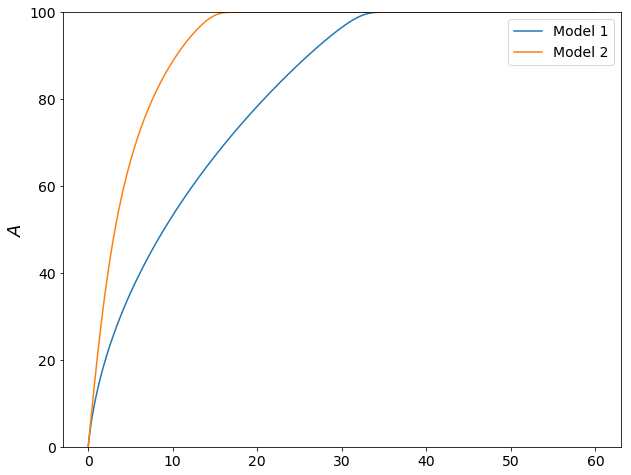

In [33]:
plt.plot(time, data_A[:,0], label='Model 1')
plt.plot(time, data_B[:,0], label='Model 2')
# plt.plot(time, data_A[:,1], label='B - model A')
# plt.plot(time, data_B[:,1], label='B - model B')
plt.ylim(0,100)
plt.ylabel('$A$')
plt.legend()

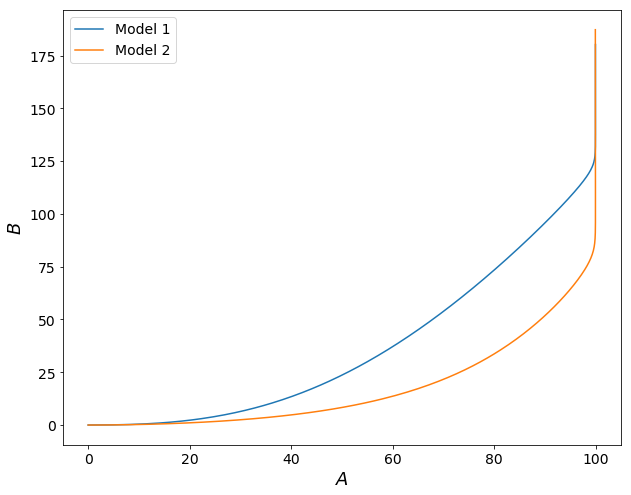

In [34]:
plt.plot(data_A[:,0], data_A[:,1], label='Model 1')
plt.plot(data_B[:,0], data_B[:,1], label='Model 2')
plt.xlabel('$A$')
plt.ylabel('$B$')
plt.legend()

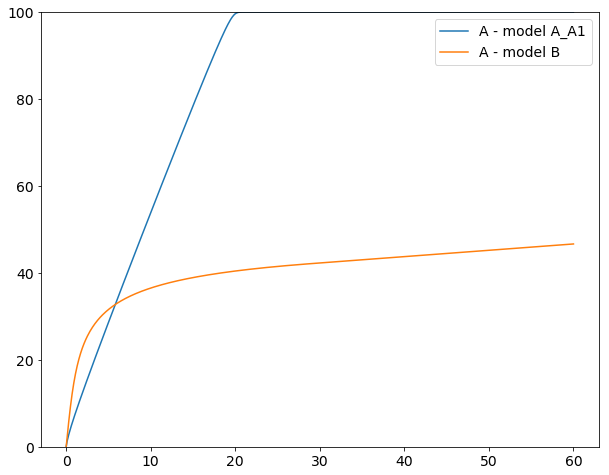

In [14]:
params_constants = [A_t, B_t, s] 

initals = [A, B]

alpha_1 = 1
beta_0 = 0.5
params =[beta_0, alpha_1, k1, k3,    k2, k4,    K_1, K_3,    K_2, K_4]


def A_A1(initals,t,params_constants,params):
    A, B = initals
    A_t, B_t, s = params_constants 
    beta_0, alpha_1, k1, k3,    k2, k4,    K_1, K_3,    K_2, K_4 = params
    
    A_I = A_t - A
    B_I = B_t - B
    
    dA = s/(1+A/beta_0) * ((k1+A*alpha_1)*A_I)/(K_1 + A_I) - (k2*A)/(K_2 + A) 
    dB = (A*k3*B_I)/(K_3 + B_I) - (k4*B)/(K_4 + B)
    
    return dA, dB

data_A_A1 = odeint(A_A1, initals, time, args=(params_constants, params))

plt.plot(time, data_A_A1[:,0], label='A - model A_A1')
plt.plot(time, data_B[:,0], label='A - model B')
# plt.plot(time, data_A[:,1], label='B - model A')
# plt.plot(time, data_B[:,1], label='B - model B')
plt.ylim(0,100)
plt.legend()


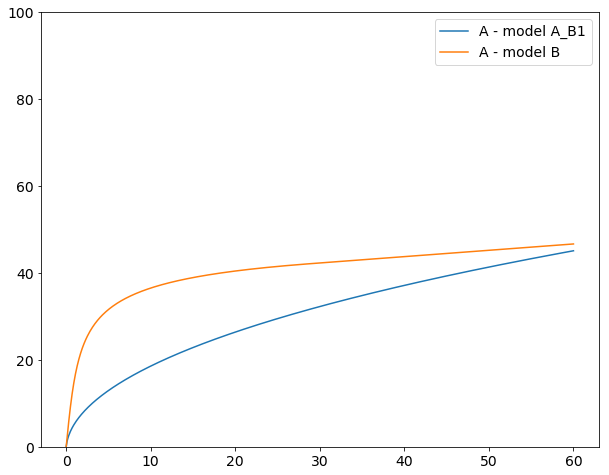

In [21]:
params_constants = [A_t, B_t, s] 

initals = [A, B]

beta_1 = 0.0005
beta_0 = 1
params =[beta_0, beta_1, k1, k3,    k2, k4,    K_1, K_3,    K_2, K_4]

def A_B1(initals,t,params_constants,params):
    A, B = initals
    A_t, B_t, s = params_constants 
    beta_0, alpha_1, k1, k3,    k2, k4,    K_1, K_3,    K_2, K_4 = params
    
    A_I = A_t - A
    B_I = B_t - B
    
    dA = s/(1+A/beta_0) * ((k1)*A_I)/(K_1 + A_I) - ((k2+beta_1*A)*A)/(K_2 + A) 
    dB = (A*k3*B_I)/(K_3 + B_I) - (k4*B)/(K_4 + B)
    
    return dA, dB

data_A_B1 = odeint(A_B1, initals, time, args=(params_constants, params))

plt.plot(time, data_A_B1[:,0], label='A - model A_B1')
plt.plot(time, data_B[:,0], label='A - model B')
# plt.plot(time, data_A[:,1], label='B - model A')
# plt.plot(time, data_B[:,1], label='B - model B')
plt.ylim(0,100)
plt.legend()

# Steady State Review

## Simple Synth + Deg

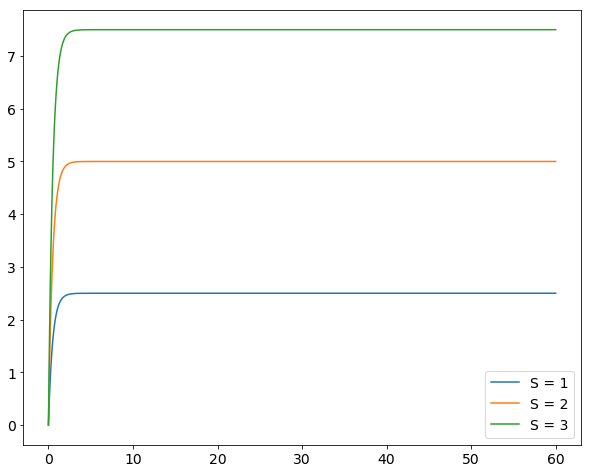

In [49]:
_max = 10
_min = 0

s = 1
k1 = 5
k2 = 2
init = [0]


def f(init, time):
    A = init
    k1, k2,s = params
    
    dA = k1*s - k2*A
    
    return dA

for s in [1,2,3]:
    params = [k1, k2, s]
    data = odeint(f,init,time)
    plt.plot(time,data, label='S = ' + str(s))
    plt.legend()



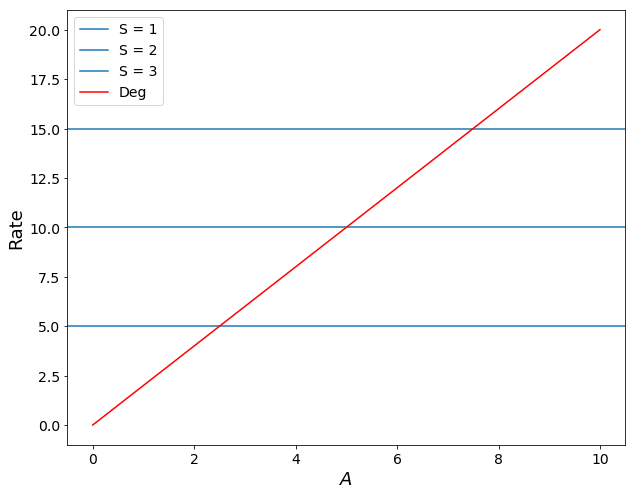

In [50]:
a_vals = np.linspace(_min, _max, 20)
# y2 = np.linspace(_min, _max, 20)
a1a = k1
a1b = k1*2
a1c = k1*3
a2 = k2*a_vals

plt.axhline(y=a1a, label='S = 1')
plt.axhline(y=a1b, label='S = 2')
plt.axhline(y=a1c, label='S = 3')
plt.plot(a_vals,a2, label='Deg',color='r')
plt.xlabel('$A$')
plt.ylabel('Rate')
plt.legend()

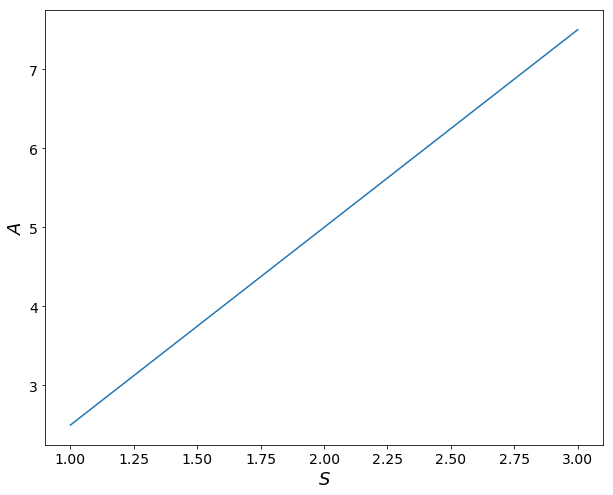

In [68]:
end = []
for s in [1,2,3]:
    params = [k1, k2, s]
    data = odeint(f,init,time)
    end.append(data[len(data)-1][0])
# end=np.asarray(end)
plt.plot([1,2,3],end)
plt.xlabel('$S$')
plt.ylabel('$A$')

## Linear Positive Feedback

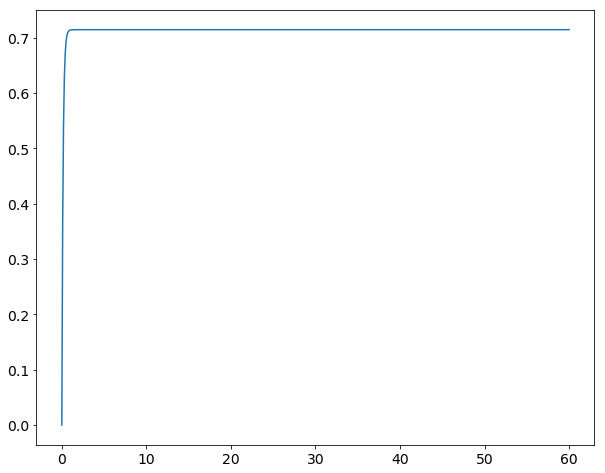

In [98]:
_max = 10
_min = 0

k1 = 5
k2 = 8
a1 = 1
init = [0]
params = [k1, k2, a1]

def f(init, time):
    A = init
    k1, k2, a1 = params
    
    dA = k1+(A*a1) - k2*A
    
    return dA

data = odeint(f,init,time)

plt.plot(time,data)

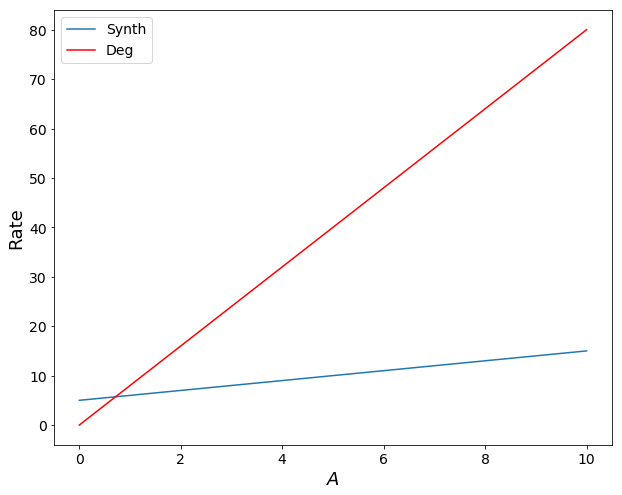

In [99]:
a_vals = np.linspace(_min, _max, 20)
# y2 = np.linspace(_min, _max, 20)
A1 = k1+(a_vals*a1)
A2 = k2*a_vals

plt.plot(a_vals,A1,label='Synth')
plt.plot(a_vals,A2, label='Deg',color='r')
plt.xlabel('$A$')
plt.ylabel('Rate')
plt.legend()

## Non-linear Positive Feedback

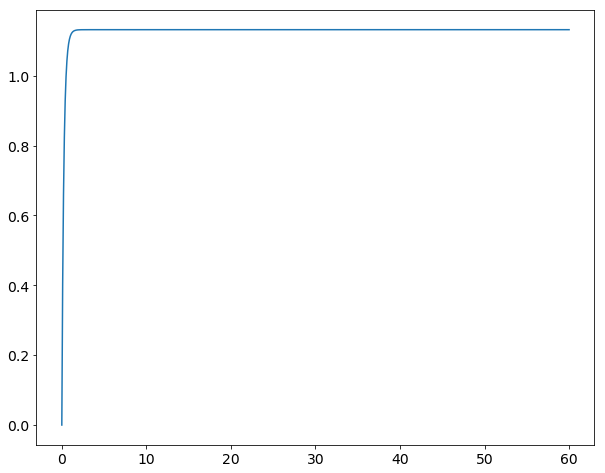

In [108]:
_max = 10
_min = 0

k1 = 5
k2 = 4.5
a1 = 9
n = 8
K1 = 2

init = [0]
params = [k1, k2, a1]

def f(init, time):
    A = init
    k1, k2, a1 = params
    
    dA = k1+a1*(A**n)/(K1**n+A**n) - k2*A
    
    return dA

data = odeint(f,init,time)

plt.plot(time,data)

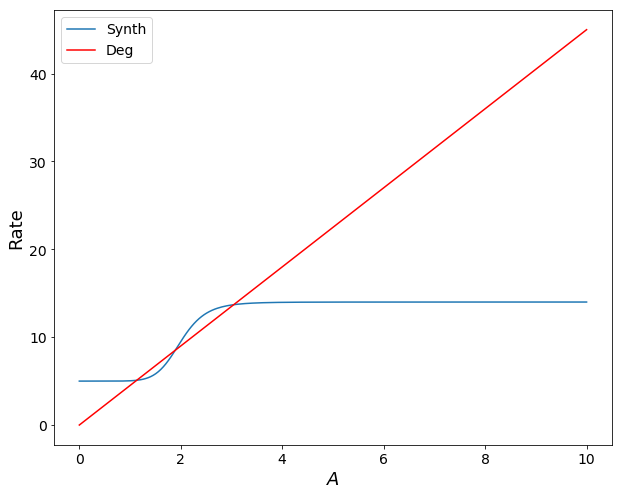

In [107]:
a_vals = np.linspace(_min, _max, 200)
# y2 = np.linspace(_min, _max, 20)
A1 = k1+a1*(a_vals**n)/(K1**n+a_vals**n)
A2 = k2*a_vals


data = odeint(f,x,time)

plt.plot(a_vals,A1,label='Synth')
plt.plot(a_vals,A2, label='Deg',color='r')
plt.xlabel('$A$')
plt.ylabel('Rate')
plt.legend()

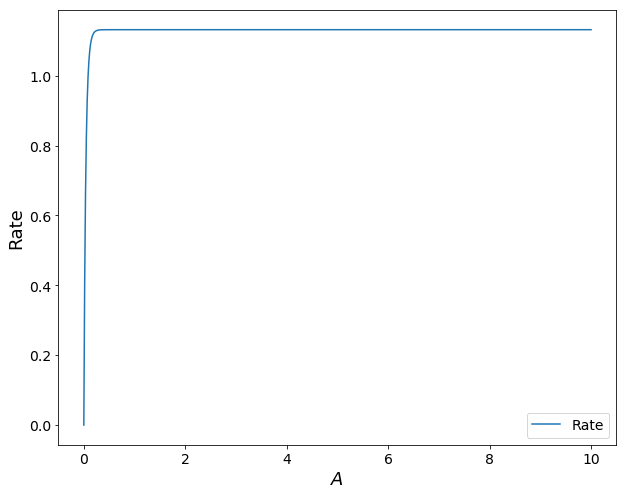

In [110]:
a_vals = np.linspace(_min, _max, 600)
# y2 = np.linspace(_min, _max, 20)
A1 = k1+a1*(a_vals**n)/(K1**n+a_vals**n)
A2 = k2*a_vals

plt.plot(a_vals,data,label='Rate')
# plt.plot(a_vals,A2, label='Deg',color='r')
plt.xlabel('$A$')
plt.ylabel('Rate')
plt.legend()

## Phosphorylation - Dephosphorylation

### Goldkosh

In [3]:
def goldkosh(u,v,j,k):
    num = 2*u*k
    s = np.sqrt((v-u+v*j+u*k)**2 - 4*(v-u)*u*k)
    den = v-u+v*j+u*k+s

    return num/den

### One Species

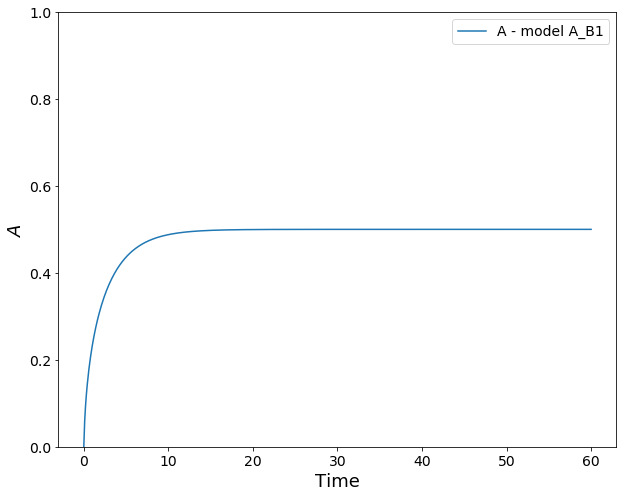

In [93]:
s = 1

k1 = 1
k2 = 1
K1 = 0.05
K2 = 0.05
RT = 1

init = [0]
params = [k1, k2, K1, K2]
params_constants = [RT, s]

def phosphor(initals,t,params_constants,params):
    A = initals
    RT, s = params_constants 
    k1, k2, K_1, K_2 = params
    
    A_I = RT - A
#     B_I = B_t - B
    
    dA = s * (k1*A_I)/(K_1 + A_I) - (k2*A)/(K_2 + A) 
#     dB = (A*k3*B_I)/(K_3 + B_I) - (k4*B)/(K_4 + B)
#     dB = k3*A - k4*B
    
    return dA

phospho = odeint(phosphor, init, time, args=(params_constants, params))

plt.plot(time, phospho, label='A - model A_B1')
# plt.plot(time, data_B[:,0], label='A - model B')
# plt.plot(time, data_A[:,1], label='B - model A')
# plt.plot(time, data_B[:,1], label='B - model B')
plt.ylim(0,1)
plt.legend()
plt.xlabel('Time')
plt.ylabel('$A$')

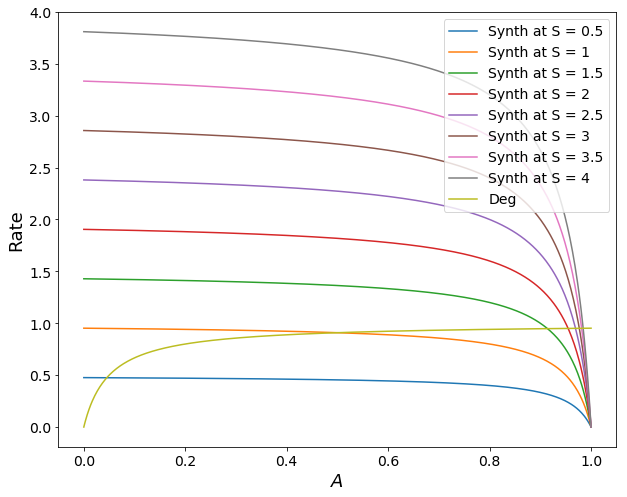

In [75]:
rpvals = np.linspace(0, 1, 600)

# pR = []
for s in [.5,1,1.5,2,2.5,3,3.5,4]:
    pR = k1*s*(RT-rpvals)/(K1 + RT-rpvals)
#     pR.append(pR)
    plt.plot(rpvals,pR, label='Synth at S = ' +str(s))
bR = k2*rpvals/(K2+rpvals)

plt.plot(rpvals,bR, label = 'Deg')
plt.xlabel('$A$')
plt.ylabel('Rate')
plt.legend()

C:\Users\sksuzuki\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


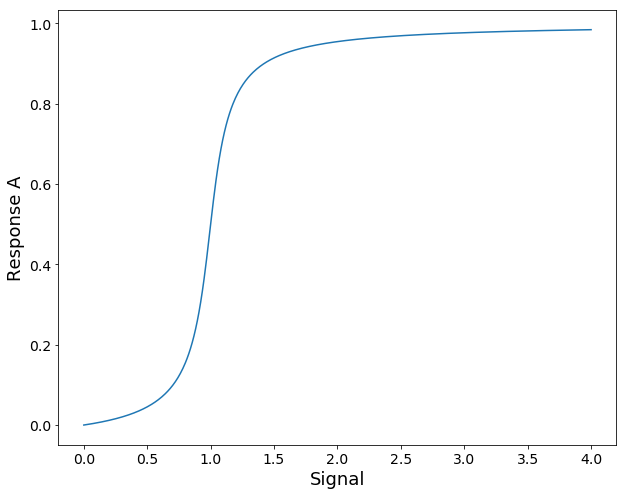

In [14]:
svals = np.linspace(0, 4, 600)

y = RT*goldkosh(k1*svals,k2,K1/RT,K2/RT)

plt.plot(svals,y)
# plt.plot(a_vals,A2, label='Deg',color='r')
plt.xlabel('Signal')
plt.ylabel('Response A')
plt.legend()

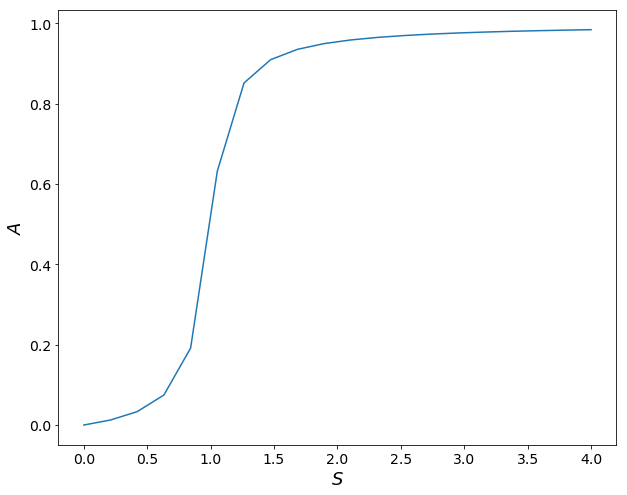

In [90]:
s = 1

k1 = 1
k2 = 1
K1 = 0.05
K2 = 0.05
RT = 1

init = [0]
params = [k1, k2, K1, K2]
params_constants = [RT, s]

sig = np.linspace(0, 4, 20)
# phospho = odeint(phosphor, init, time, args=(params_constants, params))
end = []
for s in sig:
    params_constants = [RT, s]
    data = odeint(phosphor, init, time, args=(params_constants, params))
    end.append(data[len(data)-1][0])
# end=np.asarray(end)
plt.plot(sig,end)
plt.xlabel('$S$')
plt.ylabel('$A$')

### Two Species

#### Model 1

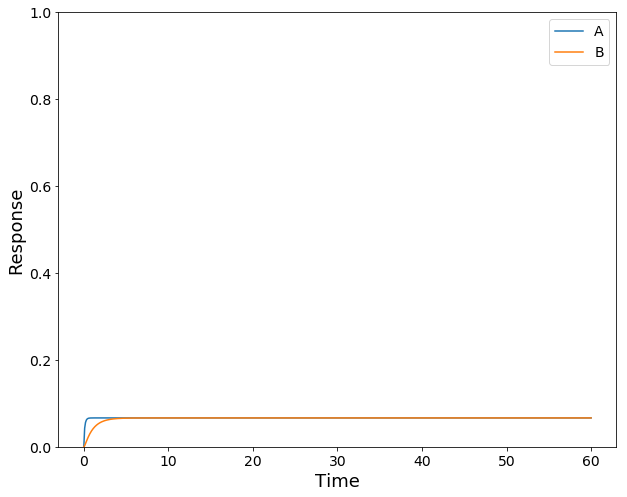

In [167]:
s = 1

k1 = 1
k2 = 1
k3 = 1
k4 = 1
K1 = 0.05
K2 = 0.05
RT = 1
B1 = .1

init = [0, 0]
params = [k1, k2, k3, k4, K1, K2]
params_constants = [RT, s]

def phosphor_1(initals,t,params_constants,params):
    A, B = initals
    RT, s = params_constants 
    k1, k2, k3, k4, K_1, K_2 = params
    
    A_I = RT - A
#     B_I = B_t - B
    
    dA = s/(1+A/B1) * (k1*A_I)/(K_1 + A_I) - (k2*A)/(K_2 + A) 
#     dB = (A*k3*B_I)/(K_3 + B_I) - (k4*B)/(K_4 + B)
    dB = k3*A - k4*B
    
    return dA, dB

phospho_1 = odeint(phosphor_1, init, time, args=(params_constants, params))

plt.plot(time, phospho_1[:,0], label='A')
plt.plot(time, phospho_1[:,1], label='B')
# plt.plot(time, data_B[:,0], label='A - model B')
# plt.plot(time, data_A[:,1], label='B - model A')
# plt.plot(time, data_B[:,1], label='B - model B')
plt.ylim(0,1)
plt.xlabel('Time')
plt.ylabel('Response')
plt.legend()

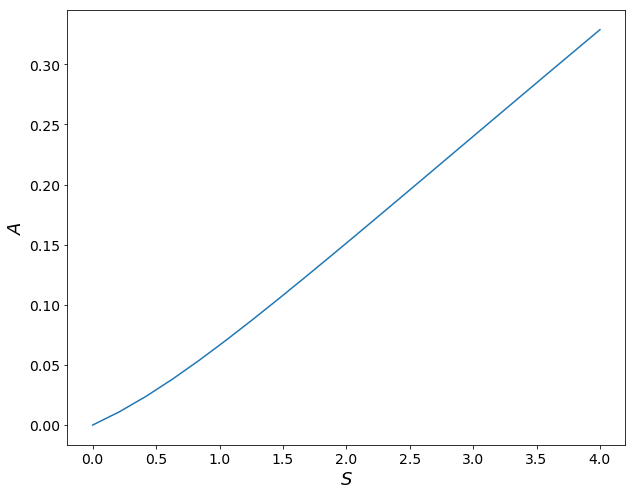

In [173]:

b = np.linspace(0, 1.5, 20)
# phospho = odeint(phosphor, init, time, args=(params_constants, params))
end = []
for s in sig:
    params_constants = [RT, s]
    data = odeint(phosphor_1, init, time, args=(params_constants, params))
    end.append(data[len(data)-1][0])
# end=np.asarray(end)
plt.plot(sig,end)
plt.xlabel('$S$')
plt.ylabel('$A$')

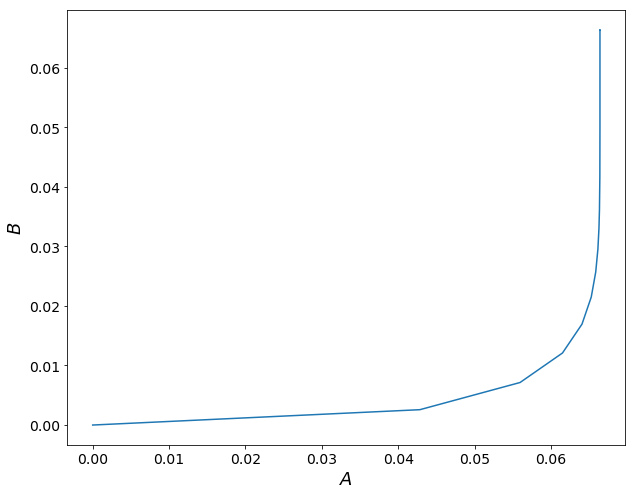

In [169]:
plt.plot(phospho_1[:,0], phospho_1[:,1])

plt.xlabel('$A$')
plt.ylabel('$B$')
# plt.legend()

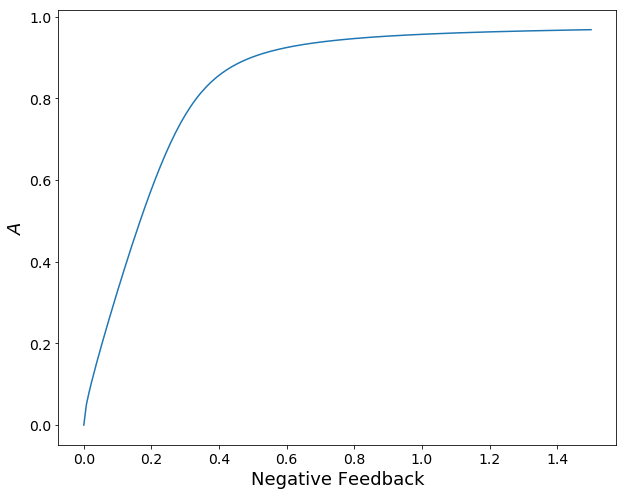

In [187]:

neg = np.linspace(0.00000001, 1.5, 200)
# phospho = odeint(phosphor, init, time, args=(params_constants, params))
end = []
for B1 in neg:
#     params_constants = [RT, s]
    B1 = B1
    data = odeint(phosphor_1, init, time, args=(params_constants, params))
    end.append(data[len(data)-1][0])
# end=np.asarray(end)
plt.plot(neg,end)
plt.xlabel('Negative Feedback')
plt.ylabel('$A$')

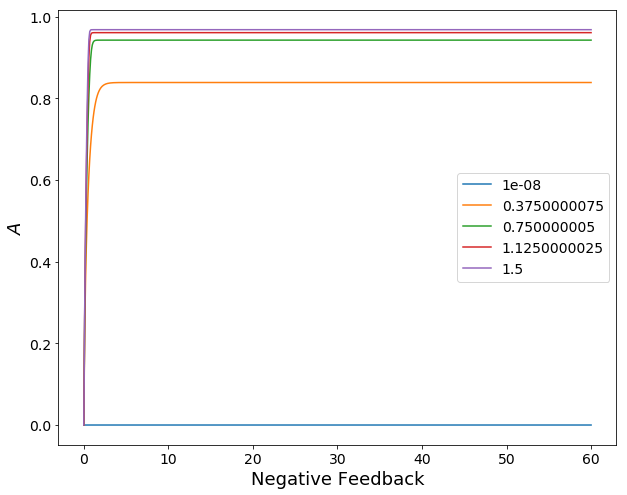

In [193]:
neg = np.linspace(0.00000001, 1.5, 5)
# phospho = odeint(phosphor, init, time, args=(params_constants, params))
end = []
for B1 in neg:
#     params_constants = [RT, s]
    B1 = B1
    data = odeint(phosphor_1, init, time, args=(params_constants, params))
#     end.append(data[len(data)-1][0])
    plt.plot(time,data[:,0], label = str(B1))
# end=np.asarray(end)
# plt.plot(neg,end)
plt.xlabel('Negative Feedback')
plt.ylabel('$A$')
plt.legend()

#### Model 2

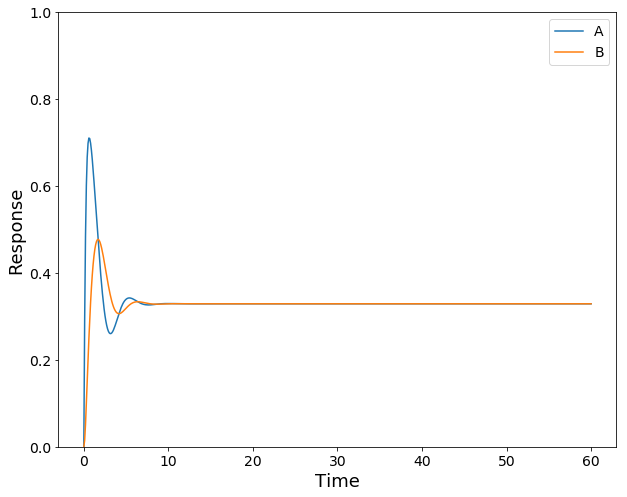

In [170]:
# s = 1

# k1 = 1
# k2 = 1
# k3 = 1
# k4 = 1
# K1 = 0.05
# K2 = 0.05
# RT = 1
# B1 = .2

# init = [0, 0]
# params = [k1, k2, k3, k4, K1, K2]
# params_constants = [RT, s]

def phosphor_2(initals,t,params_constants,params):
    A, B = initals
    RT, s = params_constants 
    k1, k2, k3, k4, K_1, K_2 = params
    
    A_I = RT - A
#     B_I = B_t - B
    
    dA = s/(1+B/B1) * (k1*A_I)/(K_1 + A_I) - (k2*A)/(K_2 + A) 
#     dB = (A*k3*B_I)/(K_3 + B_I) - (k4*B)/(K_4 + B)
    dB = k3*A - k4*B
    
    return dA, dB

phospho_2 = odeint(phosphor_2, init, time, args=(params_constants, params))

plt.plot(time, phospho_2[:,0], label='A')
plt.plot(time, phospho_2[:,1], label='B')
# plt.plot(time, data_B[:,0], label='A - model B')
# plt.plot(time, data_A[:,1], label='B - model A')
# plt.plot(time, data_B[:,1], label='B - model B')
plt.ylim(0,1)
plt.xlabel('Time')
plt.ylabel('Response')
plt.legend()

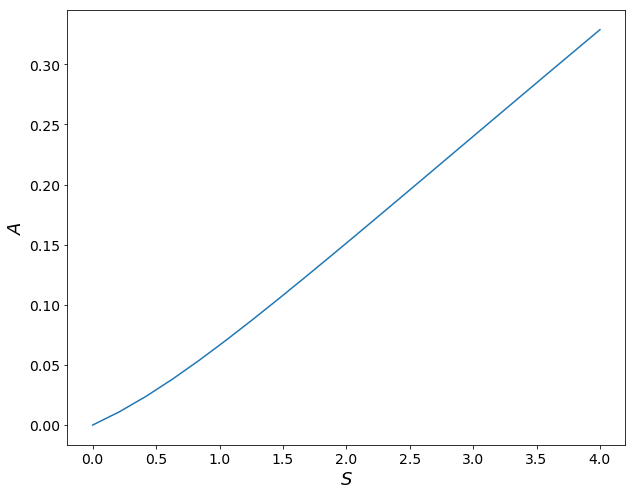

In [171]:

sig = np.linspace(0, 4, 20)
# phospho = odeint(phosphor, init, time, args=(params_constants, params))
end = []
for s in sig:
    params_constants = [RT, s]
    data = odeint(phosphor_2, init, time, args=(params_constants, params))
    end.append(data[len(data)-1][0])
# end=np.asarray(end)
plt.plot(sig,end)
plt.xlabel('$S$')
plt.ylabel('$A$')

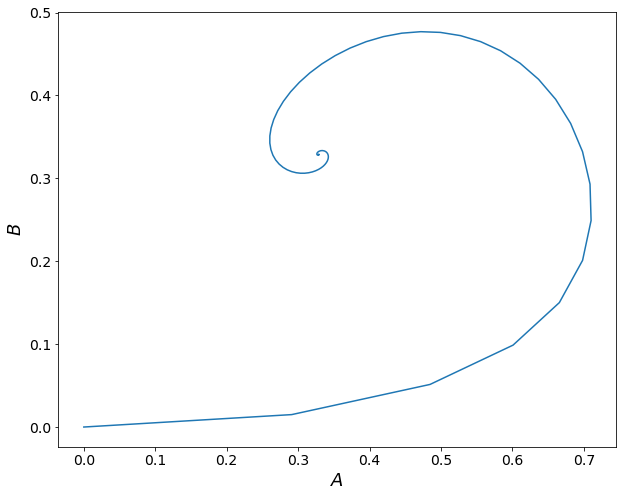

In [172]:
plt.plot(phospho_2[:,0], phospho_2[:,1])

plt.xlabel('$A$')
plt.ylabel('$B$')
# plt.legend()

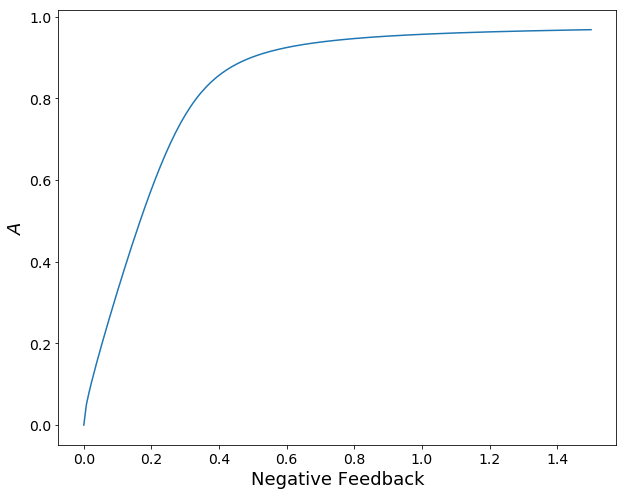

In [182]:
neg = np.linspace(0.00000001, 1.5, 200)
# phospho = odeint(phosphor, init, time, args=(params_constants, params))
end = []
for B1 in neg:
#     params_constants = [RT, s]
    B1 = B1
    data = odeint(phosphor_2, init, time, args=(params_constants, params))
    end.append(data[len(data)-1][0])
# end=np.asarray(end)
plt.plot(neg,end)
plt.xlabel('Negative Feedback')
plt.ylabel('$A$')

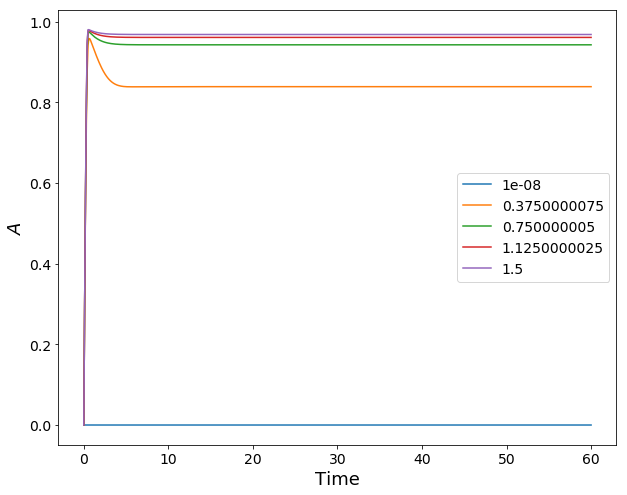

In [195]:
neg = np.linspace(0.00000001, 1.5, 5)
# phospho = odeint(phosphor, init, time, args=(params_constants, params))
end = []
for B1 in neg:
#     params_constants = [RT, s]
    B1 = B1
    data = odeint(phosphor_2, init, time, args=(params_constants, params))
#     end.append(data[len(data)-1][0])
    plt.plot(time,data[:,0], label = str(B1))
# end=np.asarray(end)
# plt.plot(neg,end)
plt.xlabel('Time')
plt.ylabel('$A$')
plt.legend()

#### Models 1 and 2

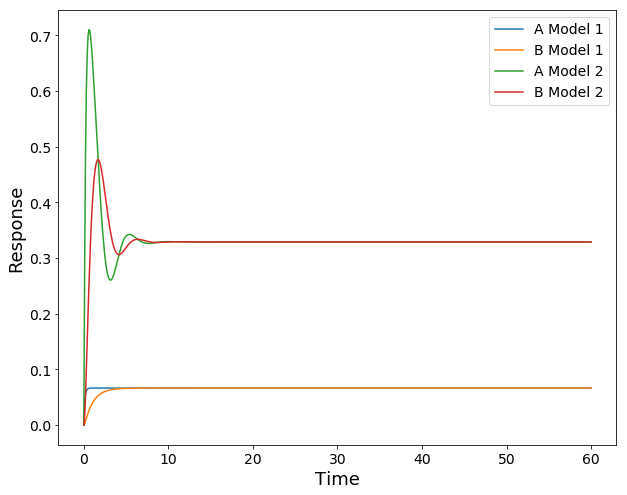

In [196]:
plt.plot(time, phospho_1[:,0], label='A Model 1')
plt.plot(time, phospho_1[:,1], label='B Model 1')
plt.plot(time, phospho_2[:,0], label='A Model 2')
plt.plot(time, phospho_2[:,1], label='B Model 2')
# plt.plot(time, data_B[:,0], label='A - model B')
# plt.plot(time, data_A[:,1], label='B - model A')
# plt.plot(time, data_B[:,1], label='B - model B')
# plt.ylim(0,1)
plt.xlabel('Time')
plt.ylabel('Response')
plt.legend()

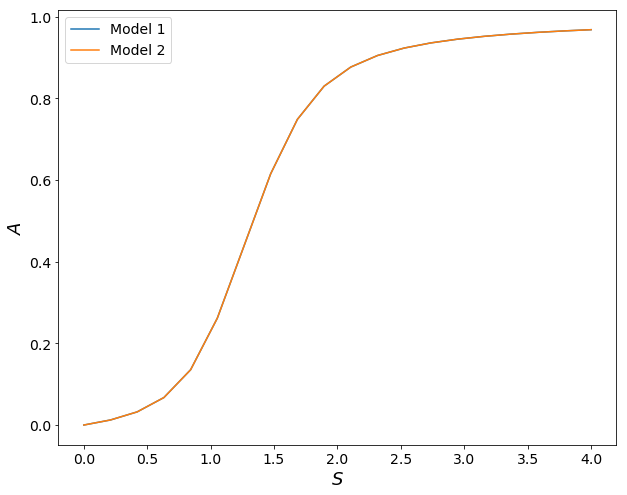

In [197]:

sig = np.linspace(0, 4, 20)
# phospho = odeint(phosphor, init, time, args=(params_constants, params))
end_1 = []
end_2 = []
for s in sig:
    params_constants = [RT, s]
    data = odeint(phosphor_1, init, time, args=(params_constants, params))
    end_1.append(data[len(data)-1][0])
    data = odeint(phosphor_2, init, time, args=(params_constants, params))
    end_2.append(data[len(data)-1][0])
# end=np.asarray(end)
plt.plot(sig,end_1, label='Model 1')
plt.plot(sig,end_2,label='Model 2')
plt.xlabel('$S$')
plt.ylabel('$A$')
plt.legend()

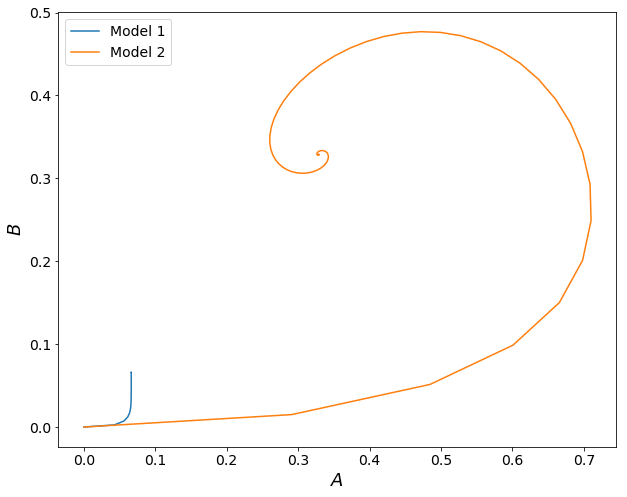

In [198]:
plt.plot(phospho_1[:,0], phospho_1[:,1], label='Model 1')
plt.plot(phospho_2[:,0], phospho_2[:,1], label='Model 2')

plt.xlabel('$A$')
plt.ylabel('$B$')
plt.legend()

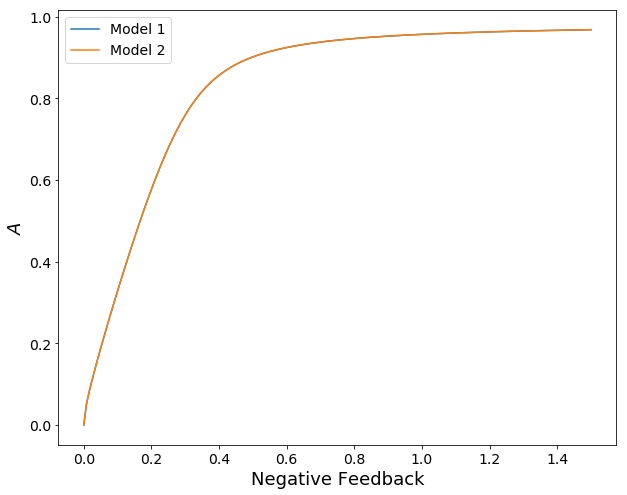

In [199]:
neg = np.linspace(0.00000001, 1.5, 200)
# phospho = odeint(phosphor, init, time, args=(params_constants, params))
end1 = []
end2 = []
for B1 in neg:
#     params_constants = [RT, s]
    B1 = B1
    data = odeint(phosphor_1, init, time, args=(params_constants, params))
    end1.append(data[len(data)-1][0])
    data = odeint(phosphor_2, init, time, args=(params_constants, params))
    end2.append(data[len(data)-1][0])
# end=np.asarray(end)
plt.plot(neg,end1, label='Model 1')
plt.plot(neg,end2, label='Model 2')
plt.xlabel('Negative Feedback')
plt.ylabel('$A$')
plt.legend()

# Phase Planes

(-100, 100)

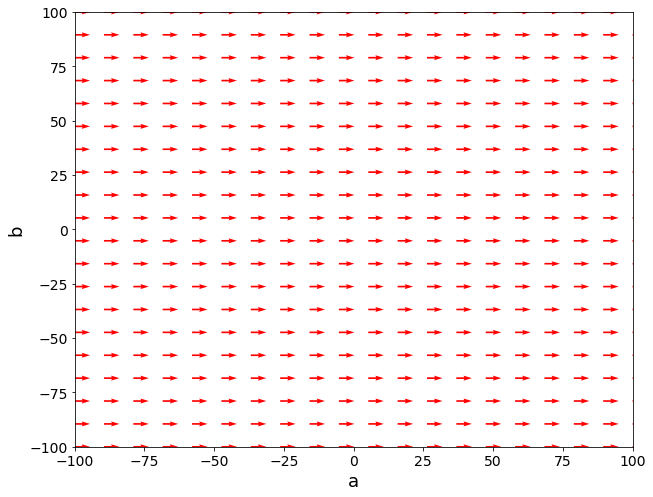

In [32]:
_max = 100
_min = -100

y1 = np.linspace(_min, _max, 20)
y2 = np.linspace(_min, _max, 20)

Y1, Y2 = np.meshgrid(y1, y2)

a, b = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = simple_A(initals,time,params_constants,params)
        a[i,j] = yprime[0]
        b[i,j] = yprime[1]

Q = plt.quiver(Y1, Y2, a, b, color='r')

plt.xlabel('a')
plt.ylabel('b')
plt.xlim([_min, _max])
plt.ylim([_min, _max])
# plt.savefig('images/phase-portrait.png')